In [8]:
#A1)
import numpy as np
from sklearn.cluster import KMeans

# Loading the data
feature_data = np.load('activation_maps_lines_image_chunk_3_MaI14_012_pixel.npy')
label_data = np.load('activation_maps_lines_thresholded_mask_chunk_3_MaI14_012_pixel.npy')

# Display shapes of the data arrays
print("Shape of feature data:", feature_data.shape)
print("Shape of label data:", label_data.shape)

# Reshape labels if they are 3-dimensional
if label_data.ndim == 3:
    # Flatten the last dimension
    label_data = label_data.reshape(-1, label_data.shape[-1])

# Combine feature and label data
combined_data = np.concatenate((feature_data, label_data), axis=1)

# Exclude the class labels (assuming they are the last column)
data_for_clustering = combined_data[:, :-1]

# Set the number of clusters for K-Means
num_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=0).fit(data_for_clustering)

# Retrieve the cluster assignments
assigned_clusters = kmeans_model.labels_

Shape of feature data: (262144, 18)
Shape of label data: (262144, 1)


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

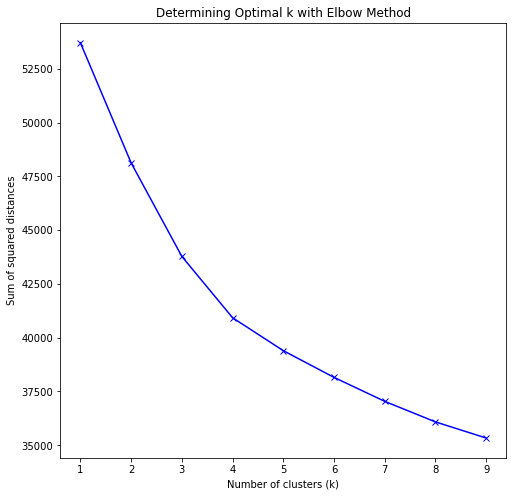

In [3]:
#A2)
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data_for_clustering' is prepared as per the initial code

# Setting up the range for k values
k_range = range(1, 10) 

# Storing the inertia values for each k
inertia_values = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=0).fit(data_for_clustering)
    inertia_values.append(model.inertia_)

# Creating the plot for the Elbow Method
plt.figure(figsize=(8, 8))
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Determining Optimal k with Elbow Method')
plt.show()


In [14]:
data_for_clustering=pd.DataFrame(data_for_clustering)

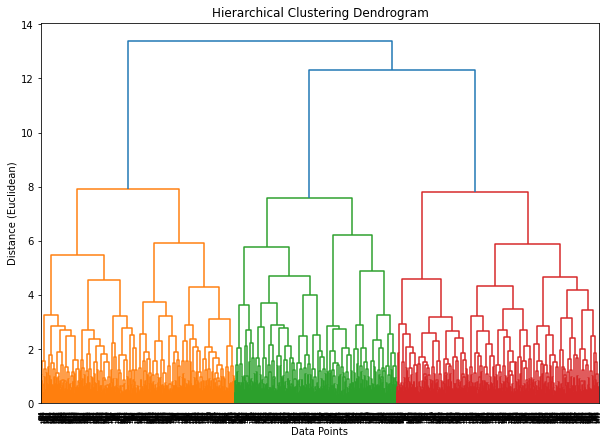

In [16]:
#A3)
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Using 'data_for_clustering' prepared in A1

# Conducting Agglomerative Clustering on the dataset
hierarchical_clustering = AgglomerativeClustering().fit(data_for_clustering.iloc[2:2000])

# Generating and displaying the Dendrogram for visualization
plt.figure(figsize=(10, 7))
dendrogram_visual = sch.dendrogram(sch.linkage(data_for_clustering.iloc[2:2000], method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance (Euclidean)')
plt.show()

In [6]:
#A4)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

# Using 'data_for_clustering' and 'label_data' from A1

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_for_clustering, label_data, test_size=0.3, random_state=0)

# Setting up the RandomForest Classifier for feature selection
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# Implementing Sequential Feature Selection
sequential_fs = SFS(rfc,
                    k_features='best',
                    forward=True,
                    floating=False,
                    scoring='accuracy',
                    cv=5)

sequential_fs = sequential_fs.fit(X_train, y_train.ravel())

# Identifying the optimal feature indices
optimal_features = list(sequential_fs.k_feature_idx_)
print("Optimal feature indices selected:", optimal_features)


Optimal feature indices selected: [3]


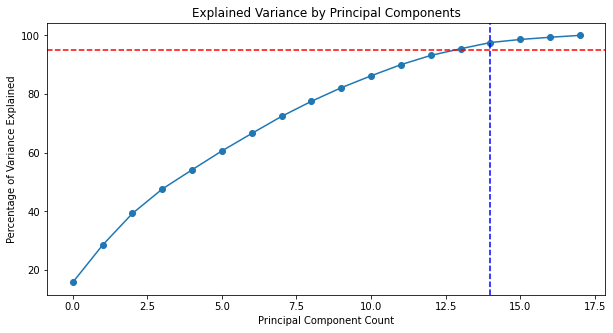

Number of principal components to retain 95% variance: 14


In [18]:
#A5)
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Using 'data_for_clustering' from A1 as the dataset for PCA

# Executing PCA
principal_component_analysis = PCA().fit(data_for_clustering)

# Calculating the cumulative sum of explained variances
cumulative_variance = np.cumsum(principal_component_analysis.explained_variance_ratio_) * 100

# Determining the number of components needed to explain 95% variance
required_components = np.argmax(cumulative_variance >= 95) + 1  # Adding 1 since index starts at 0

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component Count')
plt.ylabel('Percentage of Variance Explained')
plt.axhline(y=95, color='red', linestyle='--')
plt.axvline(x=required_components, color='blue', linestyle='--')
plt.show()

print(f"Number of principal components to retain 95% variance: {required_components}")


In [17]:
#A6)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Using 'data_for_clustering' and 'label_data' from A1

# Performing PCA to determine the number of features for 95% variance
pca_analysis = PCA().fit(data_for_clustering)
cumulative_variance = np.cumsum(pca_analysis.explained_variance_ratio_) * 100
principal_components_count = np.argmax(cumulative_variance >= 95) + 1  # Adjusting index to start from 1

# Transforming the dataset with the determined number of principal components
pca_transformation = PCA(n_components=principal_components_count)
transformed_X = pca_transformation.fit_transform(data_for_clustering)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, label_data, test_size=0.3, random_state=42)

# Training the RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train.ravel())

# Predicting and evaluating accuracy
predictions = random_forest_classifier.predict(X_test)
calculated_accuracy = accuracy_score(y_test, predictions)

print(f"Model accuracy with {principal_components_count} principal components: {calculated_accuracy}")


Model accuracy with 14 principal components: 0.6618559584965159
